In [1]:
# importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# importing the dataset

data = pd.read_excel("Data_Train.xlsx")

In [3]:
data.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
# finding if any nan values

data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [7]:
# dropping the nan value columns 

data.dropna(inplace = True)

In [8]:
data.shape

(10682, 11)

In [9]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [10]:
# seperating the month and day from the date

data["Jorney_date"] = (data["Date_of_Journey"].str.split("/").str[0]).astype(int)
data["Jorney_month"] = (data["Date_of_Journey"].str.split("/").str[1]).astype(int)
data.drop(["Date_of_Journey"],axis=1,inplace = True)
data


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jorney_date,Jorney_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [11]:
# seperating the hour and minute from the departure time

data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_minute'] = pd.to_datetime(data['Dep_Time']).dt.minute
data.drop(['Dep_Time'],axis=1, inplace = True)
data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jorney_date,Jorney_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [12]:
# seperating hour and minute from the arrival time 

data["Arr_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arr_minute"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop(["Arrival_Time"], axis=1, inplace = True)
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Jorney_date,Jorney_month,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [13]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [14]:
# replacing the stops with corresponding numbers

data['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'],[0,1,2,3,4],inplace = True)

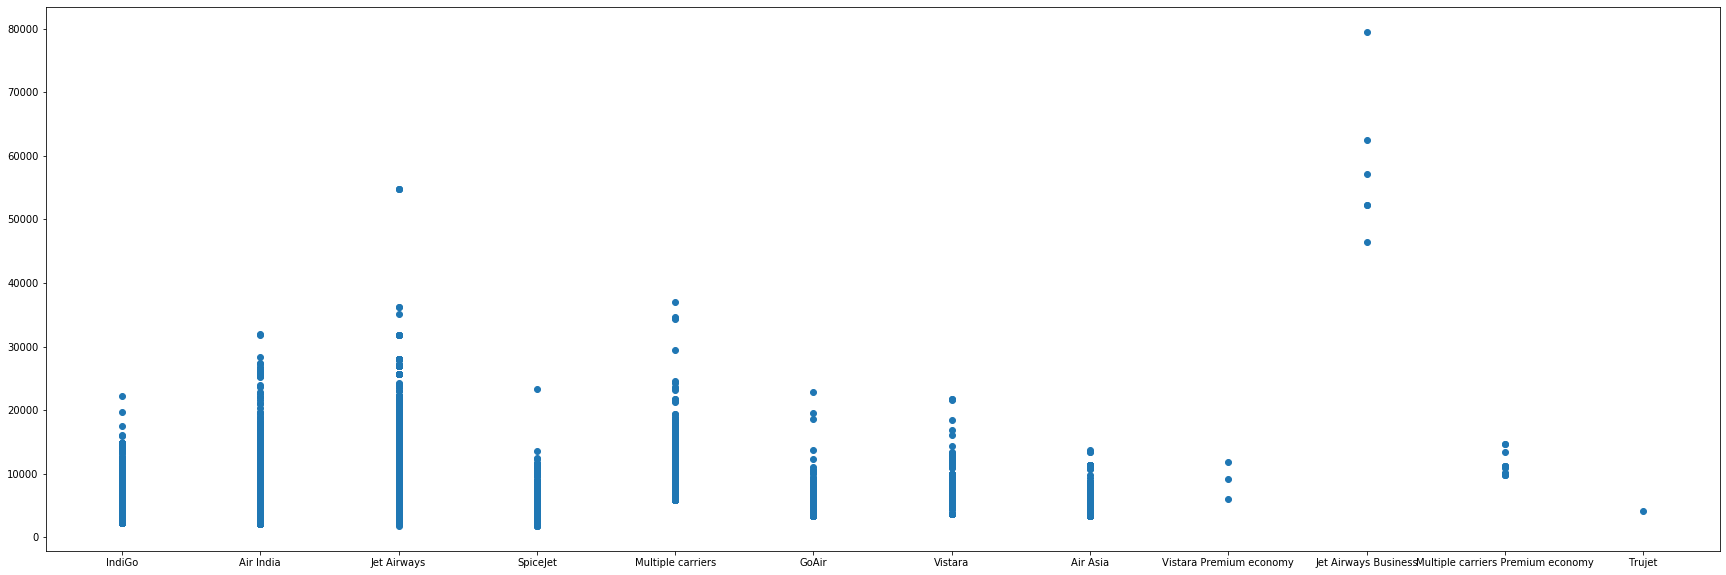

In [15]:
plt.figure(figsize=(30, 10))
plt.scatter(data["Airline"],data["Price"])

In [16]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [17]:
# calculating the total duration

duration = list(data["Duration"])

dur_list = []
for time in duration:
    dur = 0
    time = time.split()
    for i in time:
        if "h" in i:
            h = int(i[:-1])
            dur += h*60
        if "m" in i:
            m = int(i[:-1])
            dur +=m
    dur_list.append(dur) 
data["Duration"] = dur_list


In [18]:
data.corr()

,Duration,Total_Stops,Price,Jorney_date,Jorney_month,Dep_hour,Dep_minute,Arr_hour,Arr_minute
Duration,1.000000,0.738071,0.506480,-0.022439,0.014836,0.002088,-0.019099,0.051531,-0.069663
Total_Stops,0.738071,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940
Price,0.506480,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155
Jorney_date,-0.022439,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510
Jorney_month,0.014836,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626
Dep_hour,0.002088,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911
Dep_minute,-0.019099,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597
Arr_hour,0.051531,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363
Arr_minute,-0.069663,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000


In [19]:
data["Route"].nunique()

128

In [20]:
# dropping some features

data.drop(["Route","Additional_Info", "Duration"], axis=1, inplace = True)

In [21]:
y_train = data["Price"]
x_train = data

In [22]:
x_train.drop(['Price'], axis=1, inplace = True)

In [23]:
data["Destination"].nunique()

6

In [24]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [25]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [26]:
data

,Airline,Source,Destination,Total_Stops,Jorney_date,Jorney_month,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,IndiGo,Banglore,New Delhi,0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,0,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,0,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,0,1,3,11,30,14,10


In [27]:
y_train

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [28]:
# handling categorical values

x_train = pd.get_dummies(x_train, columns = ["Airline", "Source", "Destination"])

In [280]:
'''
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder = 'passthrough')
x_train = ct.fit_transform(x_train)
'''

In [29]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [30]:
x_train

,Total_Stops,Jorney_date,Jorney_month,Dep_hour,Dep_minute,Arr_hour,Arr_minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,1,0,0,...,0,0,1,0,1,0,0,0,0,0
10679,0,27,4,20,45,23,20,0,1,0,...,0,0,1,0,1,0,0,0,0,0
10680,0,27,4,8,20,11,20,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
# algorithms

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [32]:
# train test splitting

from sklearn.model_selection import train_test_split
train_x, x_test,train_y, y_test = train_test_split(x_train,y_train, test_size = 0.25, random_state = 0)

In [33]:
# model parameters for crossvalidation

model_param = {

    'random_forest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[300,500,700]
        }
    },
    'decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[5,10,20]
        }
    }
    
}

In [34]:
model_param

{'random_forest': {'model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False),
  'params': {'n_estimators': [300, 500, 700]}},
 'decision_Tree': {'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_stat

In [35]:
# grid search crossvalidation

scores = []

for mn, mp in model_param.items():
    model = GridSearchCV(mp['model'], mp['params'],cv = 5, return_train_score = False, verbose = 2)
    model.fit(train_x,train_y)
    scores.append({
        'model':mp['model'],
        'best_score':model.best_score_,
        'best_params':model.best_params_
    })


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=300 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. n_estimators=300, total=  14.2s
[CV] n_estimators=300 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.1s remaining:    0.0s


[CV] ................................. n_estimators=300, total=  14.4s
[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total=  14.2s
[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total=  13.5s
[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total=  14.4s
[CV] n_estimators=500 ................................................
[CV] ................................. n_estimators=500, total=  22.4s
[CV] n_estimators=500 ................................................
[CV] ................................. n_estimators=500, total=  23.3s
[CV] n_estimators=500 ................................................
[CV] ................................. n_estimators=500, total=  23.1s
[CV] n_estimators=500 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.8min finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.1s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.0s
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=   0.1s
[CV] max_depth=20 ....................................................
[CV] ..................................... max_depth=20, total=   0.1s
[CV] max_depth=20 ....................................................
[CV] ..................................... max_depth=20, total=   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.7s finished


In [36]:
best_param = pd.DataFrame(scores)

In [37]:
best_param

,model,best_score,best_params
0,"RandomForestRegressor(bootstrap=True, ccp_alph...",0.823440,{'n_estimators': 700}
1,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0.770464,{'max_depth': 10}


In [38]:
# creating the model

model = RandomForestRegressor(n_estimators = 500)

In [39]:
# training the model

model.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
# prediction

y_pred = model.predict(x_test)

In [41]:
y_test

10507    14781
7705      5636
7700      3597
1437     16757
8884      4804
         ...  
4178      7199
2530      4409
5257      8309
633       5198
4129      6354
Name: Price, Length: 2671, dtype: int64

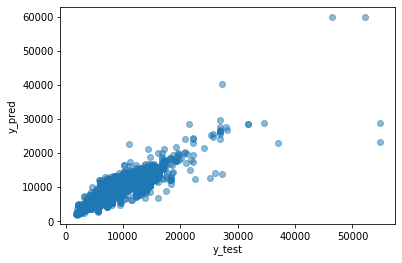

In [66]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [67]:
from sklearn import metrics

In [68]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


RMSE: 2053.540743751411


In [42]:
# saving the results

import pickle

file = open('flight.pkl', 'wb')
pickle.dump(model, file)
file.close()